In [103]:
#7주차 과제 - 농어의 길이,  높이,  폭으로 무게를 예측하는 최적의  머신러닝 모델을 만드시오
#최적의 특성 갯수를 찾으시오(그래프를 그림)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

df=pd.read_csv('perch_full.csv')
weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

weight = weight.reshape(-1,1) #weight를 1행1열로 변환
print(df. head())


   length  height  width
0     8.4    2.11   1.41
1    13.7    3.53   2.00
2    15.0    3.82   2.43
3    16.2    4.59   2.63
4    17.4    4.59   2.94


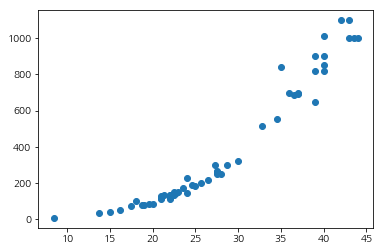

In [3]:
plt.scatter(df.length,weight)


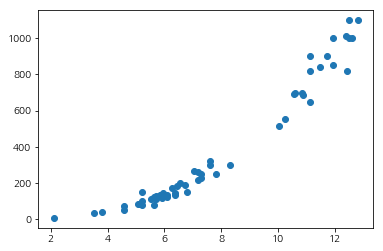

In [4]:
plt.scatter(df.height,weight)


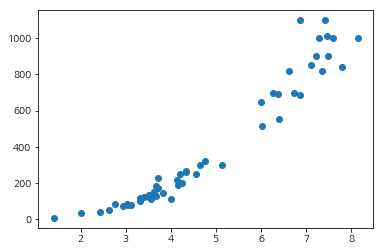

In [5]:
plt.scatter(df.width,weight)


In [104]:
train_input,test_input,train_target,test_target = train_test_split(df,weight,random_state= 42)

lr = LinearRegression()
lr.fit(train_input, train_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9559326821885706
0.8796419177546366


In [107]:
print(lr.coef_)
print(lr.intercept_)

weight=pd.DataFrame(weight, columns = ['weight']) #무게 데이터를 넘파이배열 -> 데이터 프레임으로 변환

df2 = pd.concat([df,weight],axis = 1) #-> 데이터프레임 가로로 합치기

corr = df2.corr(method = 'pearson') # 상관계수 분석 피어슨 방식계수 분석 피어슨 방식
corr # 상관계수는 셋 다 매우 높다. 그 중 height가 weight와 연관성이 높은걸 볼 수 있다.


[[ 9.07538153 69.46401443 38.00385678]]
[-599.1708083]


,length,height,width,weight
length,1.000000,0.985620,0.974574,0.958656
height,0.985620,1.000000,0.982843,0.968413
width,0.974574,0.982843,1.000000,0.963924
weight,0.958656,0.968413,0.963924,1.000000


In [113]:
poly = PolynomialFeatures(degree =2 , include_bias = False) # 데이터양 늘리기. 
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)


lr = LinearRegression()
lr.fit(train_poly, train_target)
print("train score:",lr.score(train_poly, train_target))
print("test score:",lr.score(test_poly, test_target))

print(lr.coef_)
print(lr.intercept_) # -599에서 124라는 정상적인 값으로 돌아왔음을 볼 수 있다.

print("poly 이후 데이터 개수:",train_poly.size)
print("기존 데이터 개수:",train_input.size)

train score: 0.9903183436982124
test score: 0.9714559911594164
[[  34.80604039  -88.68430232 -184.11606694   -2.2696004     8.74890226
     9.41670602   27.76120631 -119.89306061   93.68198334]]
[124.06521772]
poly 이후 데이터 개수: 378
기존 데이터 개수: 126


In [35]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [36]:


lr = LinearRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


0.9903183436982124
0.9714559911594137


In [37]:
from sklearn.linear_model import Ridge
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

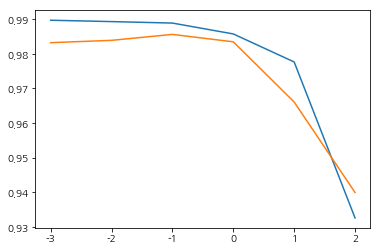

0.9889354346720892
0.9856564835209133


In [38]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()
ridge = Ridge(0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


degree 수: 1


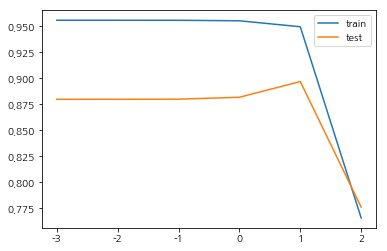

degree 수: 2


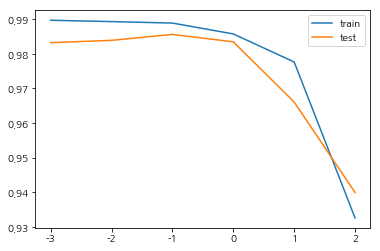

degree 수: 3


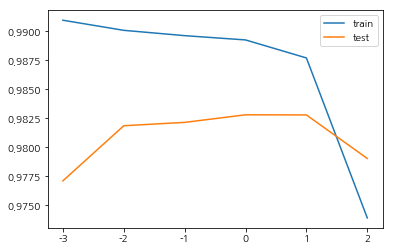

degree 수: 4


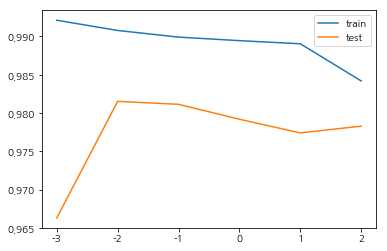

degree 수: 5


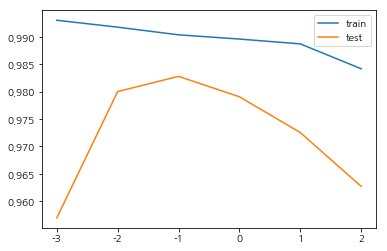

In [125]:
for i in range(1,6) :
    poly = PolynomialFeatures(degree =i , include_bias = False) # 데이터 증강 i번까지 반복
    poly.fit(train_input)
    train_poly = poly.transform(train_input)
    test_poly = poly.transform(test_input)

    ss = StandardScaler() # 표준화
    ss.fit(train_poly)

    train_scaled = ss.transform(train_poly)
    test_scaled = ss.transform(test_poly)
    train_score = []
    test_score = []

    lr = LinearRegression()
    lr.fit(train_scaled, train_target) # 모델 학습

    max = []
    alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
    for alpha in alpha_list:
        # 릿지 모델을 만듭니다
        ridge = Ridge(alpha=alpha)
        # 릿지 모델을 훈련합니다
        ridge.fit(train_scaled, train_target)
        # 훈련 점수와 테스트 점수를 저장합니다
        train_score.append(ridge.score(train_scaled, train_target))
        test_score.append(ridge.score(test_scaled, test_target))
        
    print("degree 수:",i )
    plt.plot(np.log10(alpha_list), train_score) # 데이터 증강 제곱 수별로 그래프 출력
    plt.plot(np.log10(alpha_list), test_score) 
    plt.legend(['train','test'], fontsize=10)
    plt.show()


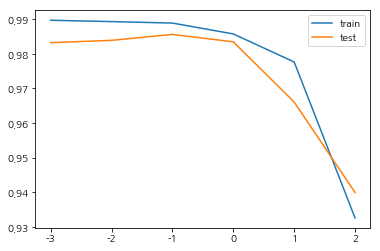

train 스코어: {0.989753186557495: 0.001, 0.9893635642716536: 0.01, 0.9889354346720892: 0.1, 0.9857915060511934: 1, 0.9776772831444959: 10, 0.9325445748770715: 100} 

test 스코어: {0.9832623296779305: 0.001, 0.9839375394503865: 0.01, 0.9856564835209133: 0.1, 0.9835057194929057: 1, 0.9660894961121521: 10, 0.9399126744040402: 100}


In [137]:

poly = PolynomialFeatures(degree =2 , include_bias = False) # 데이터 증강 i번까지 반복
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

ss = StandardScaler() # 표준화
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

train_score = []
test_score = []

lr = LinearRegression()
lr.fit(train_scaled, train_target) # 모델 학습

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
        # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
        # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
        # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
plt.plot(np.log10(alpha_list), train_score) # 데이터 증강 제곱 수별로 그래프 출력
plt.plot(np.log10(alpha_list), test_score) 
plt.legend(['train','test'], fontsize=10)
plt.show()
train = dict(zip(train_score, alpha_list)) #score 데이터와 alpha 파라미터 데이터를 딕셔너리로 변환
test = dict(zip(test_score, alpha_list))
print("train 스코어:",train,"\n")
print("test 스코어:",test)
